In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('lesson_3_data__1_.csv', encoding='windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
df.shape

(48129, 21)

In [5]:
user_df = df[['tc','art_sp']]

In [6]:
user_df.shape

(48129, 2)

In [7]:
user_df = user_df.rename(columns = {'tc': 'user_id', 'art_sp' : 'brend_info'})

In [8]:
user_df.head()

,user_id,brend_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [9]:
#brand_name = 'MARAVILLA 500 G Store_Brand'

In [10]:
#brand_name.split(' ')

In [11]:
#brand_name.split(' ')[-1]

In [12]:
#brand_name.split('G')

In [13]:
user_df.brend_info

0        MARAVILLA        500 G Store_Brand
1        FIDEO CABELLIN   500 G Store_Brand
2              SPAGUETTI Nє 5 500 G Brand_1
3             FIDEO FIDEUБ      500 Brand_7
4            MACARRONES  GRATINAR 5 Brand_2
                        ...                
48124        FIDEOS 0         500 G Brand_4
48125        PLUMAS 3         500 G Brand_4
48126    MACARRONES       500 G Store_Brand
48127    SPAGHETTI        500 G Store_Brand
48128    SPAGHETTINI      500 G Store_Brand
Name: brend_info, Length: 48129, dtype: object

 def f(x):
    return x*2

f(6)

def split_brend(brend_name_data):
    return brend_name_data.split(' ')[-1]

 user_df['brand_name'] = user_df.brend_info.apply(split_brend)

In [14]:
 user_df['brand_name'] = user_df.brend_info.apply(lambda x: x.split(' ')[-1] )

In [15]:
user_df.head()

,user_id,brend_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [16]:
#группируем по пользователям с указанием количества их покупок
users_purchases = user_df.groupby('user_id', as_index=False)\
.agg({'brand_name' : 'count'})\
.rename(columns={'brand_name': 'purchases'})\
.query('purchases >= 5')

In [17]:
#группируем по пользователям с указанием количества уникальных брендов
unique_brands = user_df.groupby('user_id', as_index=False)\
.agg({'brand_name' : pd.Series.nunique})\
.rename(columns={'brand_name' : 'unique_brand'})

In [18]:
unique_brands.head()

,user_id,unique_brand
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [19]:
unique_brands.user_id.nunique()

11764

In [20]:
unique_brands.user_id

0       -1236394515
1              1031
2              4241
3             17311
4             17312
            ...    
11759    1408817589
11760    1408825059
11761    1408832719
11762    1408840919
11763    1408849249
Name: user_id, Length: 11764, dtype: int64

In [21]:
unique_brands['unique_brand']

0        1
1        2
2        2
3        1
4        2
        ..
11759    2
11760    1
11761    1
11762    1
11763    1
Name: unique_brand, Length: 11764, dtype: int64

In [22]:
users_purchases


,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [23]:
users_purchases.purchases.median()

7.0

In [24]:
users_purchases.shape

(3383, 2)

In [25]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [26]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [27]:
user_df.groupby(['user_id', 'brand_name'], as_index=False) \
.agg({'brend_info' : 'count'}) \
.query('user_id == 1031')

,user_id,brand_name,brend_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


In [28]:
lovely_brand_purchases = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
.agg({'brend_info' : 'count'}) \
.sort_values(['user_id', 'brend_info'], ascending=[False, False])\
.groupby('user_id')\
.head(1)\
.rename(columns = {'brand_name' : 'lovely_brand', 'brend_info' : 'lovely_brand_purchases'})

In [29]:
lovely_brand_purchases.head()

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [30]:
x = [1,2,3]

In [31]:
x

[1, 2, 3]

In [32]:
y = pd.Series([3,6,7,8,5,2,3,8,9])

In [33]:
y

0    3
1    6
2    7
3    8
4    5
5    2
6    3
7    8
8    9
dtype: int64

In [34]:
y.nunique()

7

In [35]:
y.max()

9

In [36]:
y.min()

2

In [37]:
y.mean()

5.666666666666667

In [38]:
y.median()

6.0

In [39]:
d = pd.DataFrame({'x': [1,4,6,7,8,9], 'y' : ['a','c','y','f','u','w',]})

In [40]:
d

,x,y
0,1,a
1,4,c
2,6,y
3,7,f
4,8,u
5,9,w


In [41]:
d.x

0    1
1    4
2    6
3    7
4    8
5    9
Name: x, dtype: int64

In [42]:
#??pd.DataFrame.merge

In [43]:
#??print

In [44]:
users_purchases \
.merge(unique_brands, on = 'user_id') \
.merge(lovely_brand_purchases, on = 'user_id')
                     

,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [45]:
loyalty_df = users_purchases \
.merge(unique_brands, on = 'user_id', how = 'inner') \
.merge(lovely_brand_purchases, on = 'user_id', how ='inner')

In [46]:
loyalty_df.head()

,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [47]:
loyalty_df[loyalty_df.unique_brand == 1]

,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [48]:
loyale_users = loyalty_df[loyalty_df.unique_brand == 1]

In [49]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases/loyalty_df.purchases

In [50]:
loyalty_df.head(9)

,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000
5,63001,8,2,Brand_4,7,0.875000
6,63441,6,2,Store_Brand,4,0.666667
7,64121,5,3,Brand_3,2,0.400000
8,69371,14,2,Brand_4,12,0.857143


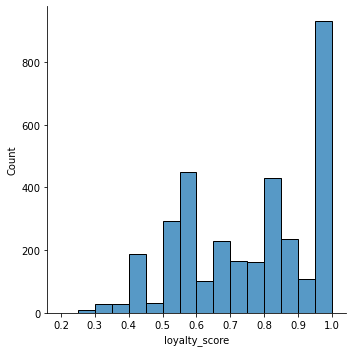

In [51]:
ax = sns.displot(loyalty_df.loyalty_score)

In [54]:
loyalty_df.loyalty_score.median()

0.8

In [53]:
loyalty_df.loyalty_score.median()

0.8

In [61]:
brand_loyalty = loyalty_df.groupby('lovely_brand', as_index=False)\
    .agg({'loyalty_score':'median', 'user_id':'count'})

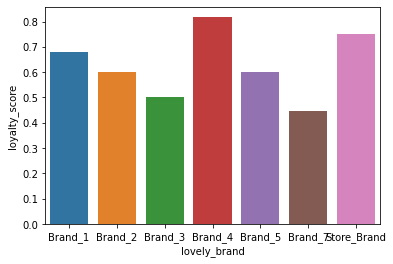

In [67]:
ax = sns.barplot(x="lovely_brand", y="loyalty_score", data=brand_loyalty)

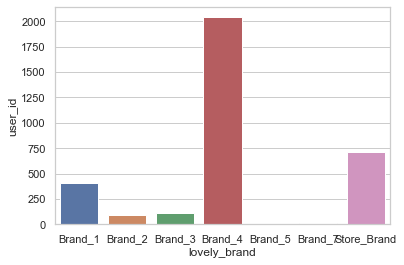

In [70]:
sns.set_theme(style="whitegrid")
al = sns.barplot(x="lovely_brand", y="user_id", data=brand_loyalty)